<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 120.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 79.6 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [12]:
## Write your code here
# Check missing values in specific columns
missing_summary = df[['Employment', 'JobSat', 'RemoteWork']].isna().sum()
print("Missing values summary:")
print(missing_summary)
missing_percent = (df[['Employment', 'JobSat', 'RemoteWork']].isnull().mean()) * 100
print("Percentage of missing values:")
print(missing_percent)
df.dropna(subset=['JobSat'], inplace=True)
df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace=True)
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

Missing values summary:
Employment    0
JobSat        0
RemoteWork    0
dtype: int64
Percentage of missing values:
Employment    0.0
JobSat        0.0
RemoteWork    0.0
dtype: float64
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


/tmp/ipykernel_298/1563339386.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace=True)


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [22]:
## Write your code here
#print(df['YearsCodePro'].unique())
# Clean and convert YearsCodePro to numeric
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 50
})

# Convert column to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
print(df['YearsCodePro'].unique())
# Drop rows with missing YearsCodePro or JobSat for clean analysis
df = df.dropna(subset=['YearsCodePro', 'JobSat'])

# Define experience ranges
bins = [0, 5, 10, 20, 50]
labels = ['0-5 years', '5-10 years', '10-20 years', '20+ years']

# Create new categorical column
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, include_lowest=True)
median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median().reset_index()
print(median_satisfaction)

[ nan 12.  27.  10.   0.5 18.  15.  17.   6.   7.  16.  14.   4.   8.
  2.  29.   5.  30.   1.  25.  24.  26.   9.  20.  37.  11.   3.  13.
 19.  21.  23.  34.  28.  32.  22.  33.  40.  39.  31.  35.  41.  38.
 50.  36.  43.  42.  45.  44.  46.  48.  47.  49. ]
  ExperienceRange  JobSat
0       0-5 years     7.0
1      5-10 years     7.0
2     10-20 years     8.0
3       20+ years     8.0


/tmp/ipykernel_298/3886055061.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, include_lowest=True)
/tmp/ipykernel_298/3886055061.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median().reset_index()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_298/1715864445.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobSat', data=df, order=df['JobSat'].value_counts().index, palette='viridis')


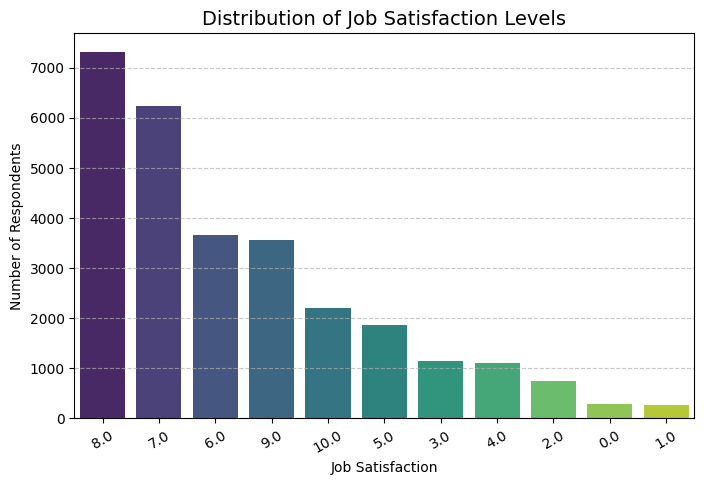

In [23]:
## Write your code here
# Drop missing JobSat values for clean visualization
df = df.dropna(subset=['JobSat'])

# Set figure size and style
plt.figure(figsize=(8,5))
sns.countplot(x='JobSat', data=df, order=df['JobSat'].value_counts().index, palette='viridis')

# Add title and labels
plt.title('Distribution of Job Satisfaction Levels', fontsize=14)
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_298/3221078839.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RemoteWork', data=df_clean, palette='coolwarm')


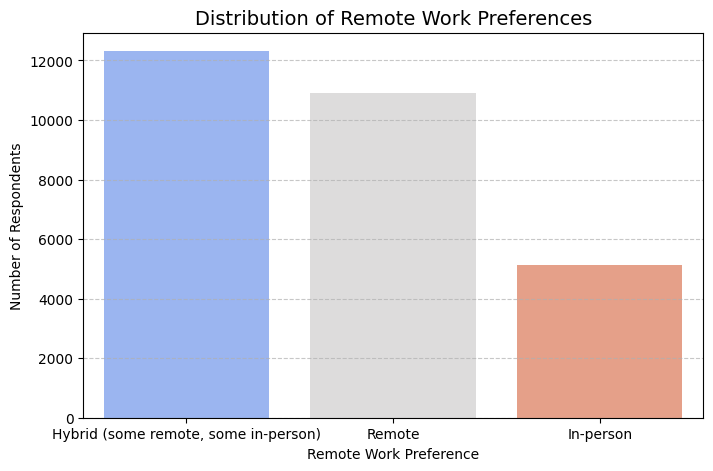

Cross-tabulation: Remote Work Preferences by Employment Type

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                 9755   
Employed, full-time;Employed, part-time                                               48   
Employed, full-time;Independent contractor, fre...                                   800   
Employed, full-time;Independent contractor, fre...                                    52   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Independent contractor, free...                                     1   
Student, full-time;Not employed, but looking fo...                                     1   
Student, full-time

/tmp/ipykernel_298/3221078839.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


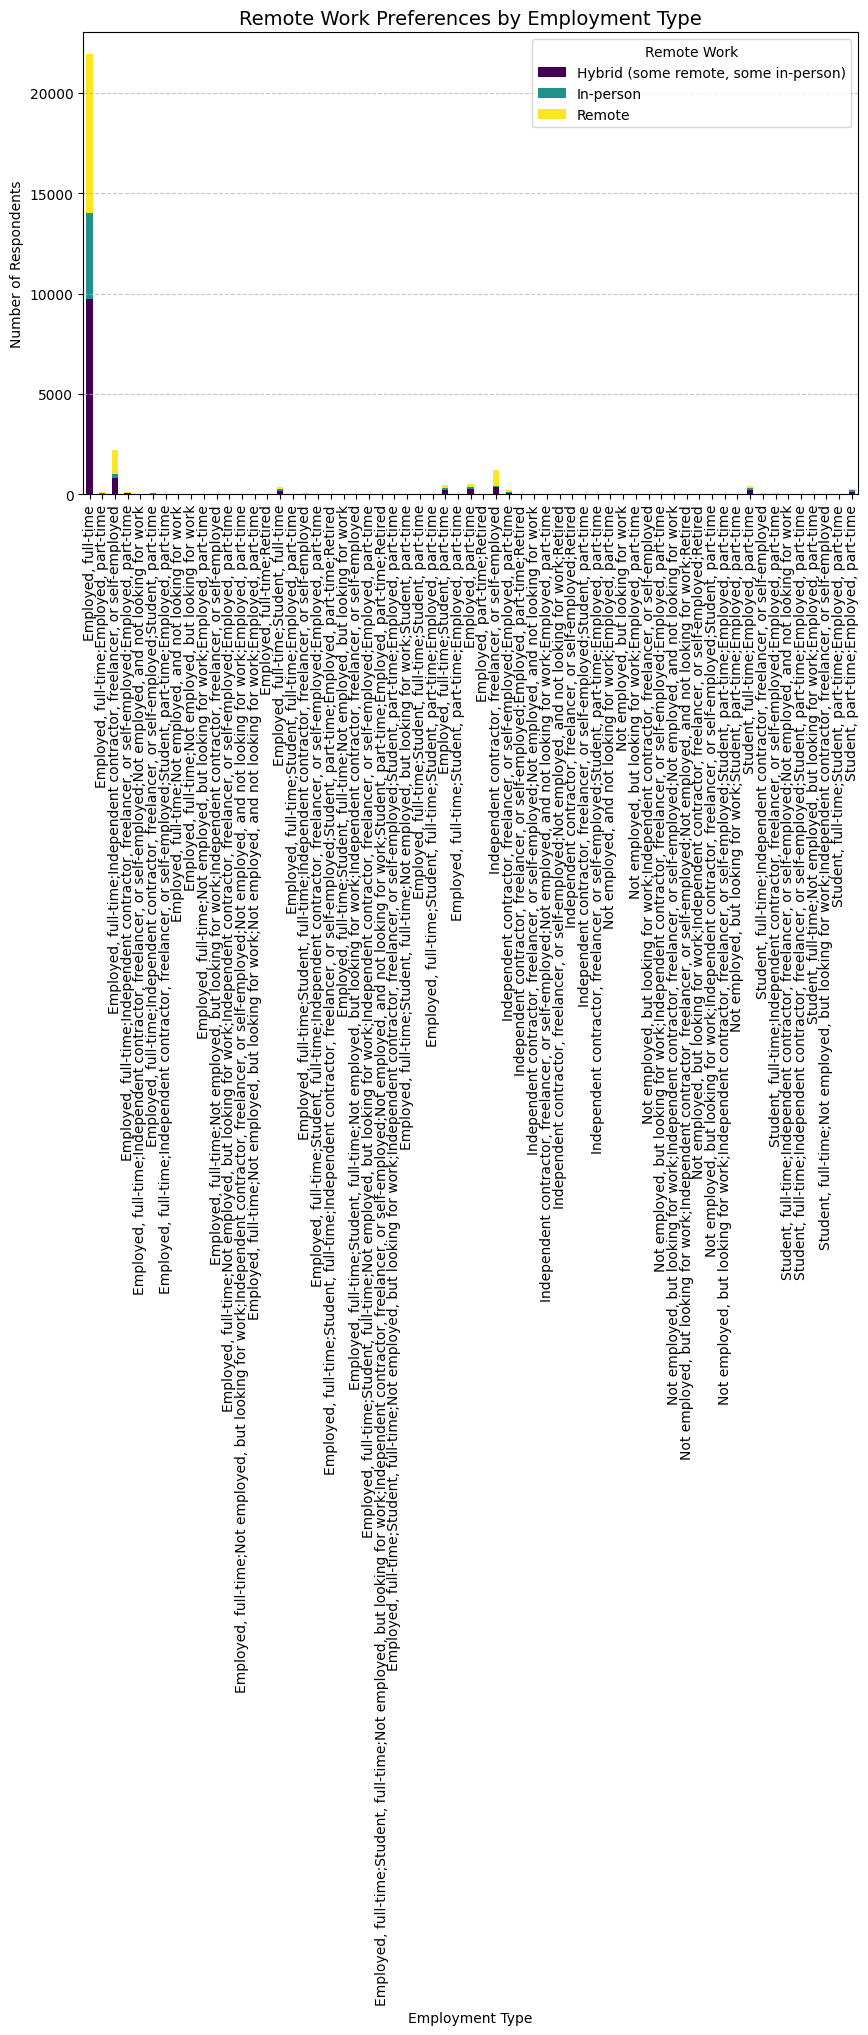

In [24]:
## Write your code here
# Drop rows with missing RemoteWork or Employment values
df_clean = df.dropna(subset=['RemoteWork', 'Employment'])

# Count Plot for Remote Work Distribution 
plt.figure(figsize=(8,5))
sns.countplot(x='RemoteWork', data=df_clean, palette='coolwarm')
plt.title('Distribution of Remote Work Preferences', fontsize=14)
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Cross-tabulate Remote Work preferences by Employment Type
remote_employment_ct = pd.crosstab(df_clean['Employment'], df_clean['RemoteWork'])

print("Cross-tabulation: Remote Work Preferences by Employment Type\n")
print(remote_employment_ct)

# Optional: Visualize cross-tab as a stacked bar chart
remote_employment_ct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title('Remote Work Preferences by Employment Type', fontsize=14)
plt.xlabel('Employment Type')
plt.ylabel('Number of Respondents')
plt.legend(title='Remote Work')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


   Region    Language  Count
22  Other  JavaScript  18044
40  Other         SQL  15730
19  Other    HTML/CSS  15005
36  Other      Python  13923
44  Other  TypeScript  12355


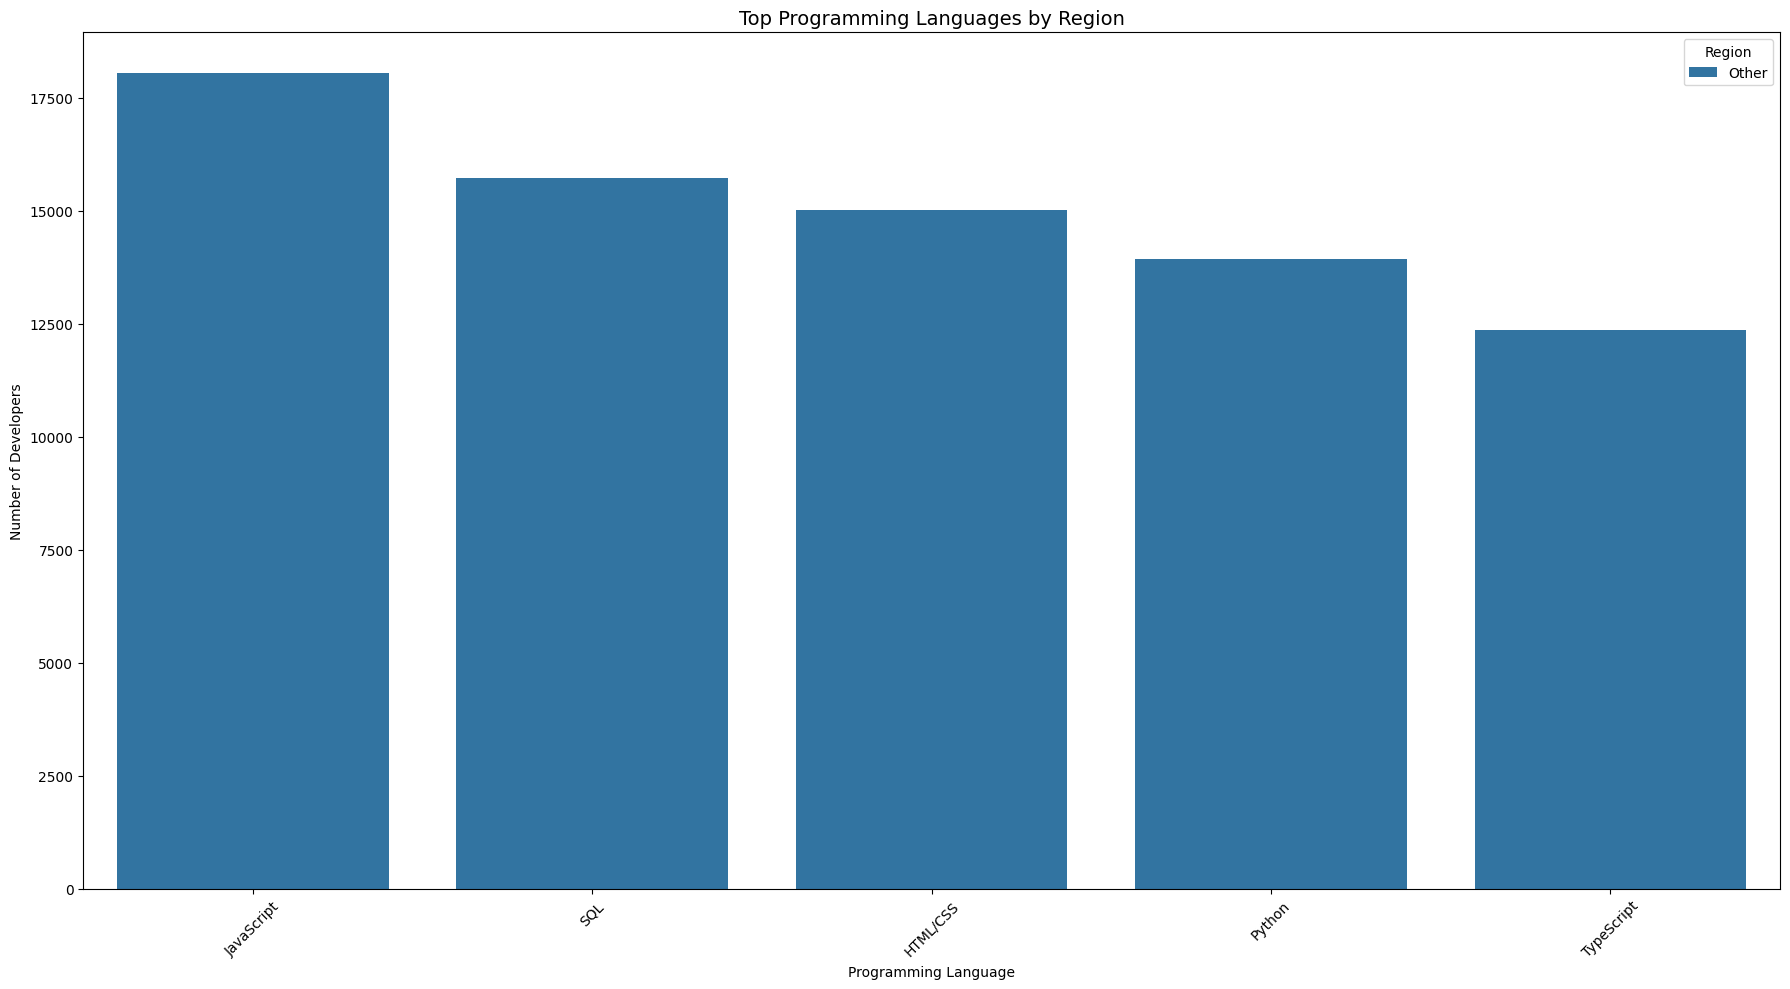

In [58]:
## Write your code here
#print(df['LanguageHaveWorkedWith'])
#print(df['Country'].unique())
# --- 1️⃣ Filter relevant columns ---
df_lang = df[['Country', 'LanguageHaveWorkedWith']].dropna()
df_lang = df_lang.assign(Language=df_lang['LanguageHaveWorkedWith'].str.split(';')).explode('Language')
regions = {
    # North America
    'United States of America': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'Costa Rica': 'North America',
    'Jamaica': 'North America',
    'Guatemala': 'North America',
    'Cuba': 'North America',
    'Honduras': 'North America',
    'Panama': 'North America',
    'Nicaragua': 'North America',
    'Belize': 'North America',
    'Dominican Republic': 'North America',
    'El Salvador': 'North America',
    
    # South America
    'Brazil': 'South America',
    'Argentina': 'South America',
    'Peru': 'South America',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Venezuela, Bolivarian Republic of...': 'South America',
    'Bolivia': 'South America',
    'Uruguay': 'South America',
    'Paraguay': 'South America',
    'Ecuador': 'South America',
    'Suriname': 'South America',
    'Guyana': 'South America',
    
    # Europe
    'United Kingdom of Great Britain and Northern Ireland': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Portugal': 'Europe',
    'Netherlands': 'Europe',
    'Belgium': 'Europe',
    'Switzerland': 'Europe',
    'Austria': 'Europe',
    'Sweden': 'Europe',
    'Finland': 'Europe',
    'Norway': 'Europe',
    'Denmark': 'Europe',
    'Poland': 'Europe',
    'Ireland': 'Europe',
    'Czech Republic': 'Europe',
    'Romania': 'Europe',
    'Hungary': 'Europe',
    'Greece': 'Europe',
    'Slovakia': 'Europe',
    'Lithuania': 'Europe',
    'Latvia': 'Europe',
    'Estonia': 'Europe',
    'Croatia': 'Europe',
    'Slovenia': 'Europe',
    'Serbia': 'Europe',
    'Bulgaria': 'Europe',
    'Luxembourg': 'Europe',
    'Malta': 'Europe',
    'Monaco': 'Europe',
    'Andorra': 'Europe',
    'Iceland': 'Europe',
    'Albania': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Republic of North Macedonia': 'Europe',
    'Republic of Moldova': 'Europe',
    'Liechtenstein': 'Europe',
    'Kosovo': 'Europe',
    'San Marino': 'Europe',

    # Asia
    'India': 'Asia',
    'China': 'Asia',
    'Japan': 'Asia',
    'Singapore': 'Asia',
    'Philippines': 'Asia',
    'Pakistan': 'Asia',
    'Bangladesh': 'Asia',
    'Sri Lanka': 'Asia',
    'Nepal': 'Asia',
    'Viet Nam': 'Asia',
    'Malaysia': 'Asia',
    'Thailand': 'Asia',
    'Indonesia': 'Asia',
    'Republic of Korea': 'Asia',
    'South Korea': 'Asia',
    'Hong Kong (S.A.R.)': 'Asia',
    'Taiwan': 'Asia',
    'Cambodia': 'Asia',
    'Myanmar': 'Asia',
    'Maldives': 'Asia',
    'Mongolia': 'Asia',
    'Kazakhstan': 'Asia',
    'Uzbekistan': 'Asia',
    'Turkmenistan': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Tajikistan': 'Asia',
    "Lao People's Democratic Republic": 'Asia',
    'Iran, Islamic Republic of...': 'Asia',
    'Israel': 'Asia',
    'United Arab Emirates': 'Asia',
    'Qatar': 'Asia',
    'Bahrain': 'Asia',
    'Kuwait': 'Asia',
    'Oman': 'Asia',
    'Saudi Arabia': 'Asia',
    'Jordan': 'Asia',
    'Iraq': 'Asia',
    'Syrian Arab Republic': 'Asia',
    'Palestine': 'Asia',
    'Lebanon': 'Asia',
    'Armenia': 'Asia',
    'Azerbaijan': 'Asia',
    'Afghanistan': 'Asia',
    'Bhutan': 'Asia',

    # Africa
    'Nigeria': 'Africa',
    'South Africa': 'Africa',
    'Egypt': 'Africa',
    'Ethiopia': 'Africa',
    'Morocco': 'Africa',
    'Kenya': 'Africa',
    'Uganda': 'Africa',
    'Ghana': 'Africa',
    'Algeria': 'Africa',
    'Tunisia': 'Africa',
    'Sudan': 'Africa',
    'Zimbabwe': 'Africa',
    'Rwanda': 'Africa',
    'Senegal': 'Africa',
    'Zambia': 'Africa',
    'Namibia': 'Africa',
    'Tanzania': 'Africa',
    'Madagascar': 'Africa',
    'Cameroon': 'Africa',
    'Malawi': 'Africa',
    'Mozambique': 'Africa',
    'Niger': 'Africa',
    'Benin': 'Africa',
    'Angola': 'Africa',
    'Burkina Faso': 'Africa',
    'Côte d\'Ivoire': 'Africa',
    'Mauritius': 'Africa',
    'Mauritania': 'Africa',
    'Sierra Leone': 'Africa',
    'Somalia': 'Africa',
    'Lesotho': 'Africa',
    'Botswana': 'Africa',
    'Burundi': 'Africa',
    'Central African Republic': 'Africa',
    'Congo, Republic of the...': 'Africa',
    'Democratic Republic of the Congo': 'Africa',
    'Libyan Arab Jamahiriya': 'Africa',
    'Cape Verde': 'Africa',
    'Togo': 'Africa',

    # Oceania
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
    'Fiji': 'Oceania',

    # Special/Other
    'Nomadic': 'Other',
}

# Map each country to a region
def map_region(country):
    for region, countries in regions.items():
        if country in countries:
            return region
    return 'Other'

df_lang['Region'] = df_lang['Country'].apply(map_region)


# Check results
#print(df[['Country', 'Region']].head(20))

# Group by Region and Language 
lang_trends = (
    df_lang.groupby(['Region', 'Language'])
    .size()
    .reset_index(name='Count')
)

# Get Top 5 Languages per Region 
top_langs = (
    lang_trends.sort_values(['Region', 'Count'], ascending=[True, False])
    .groupby('Region')
    .head(5)
)
print(top_langs)
# Visualization: Bar Plot 
plt.figure(figsize=(18, 10))
sns.barplot(data=top_langs, x='Language', y='Count', hue='Region')
plt.title('Top Programming Languages by Region', fontsize=14)
plt.xlabel('Programming Language')
plt.ylabel('Number of Developers')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


Correlation between Years of Experience and Job Satisfaction: -0.03


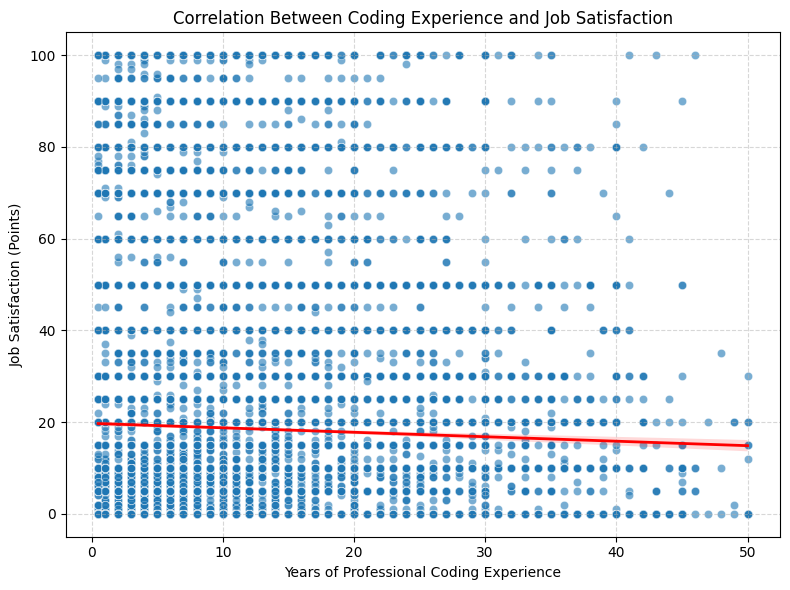

In [59]:
## Write your code here
#print(df['YearsCodePro'].unique())
# Convert YearsCodePro to numeric (replace 'Less than 1 year', 'More than 50 years')
df['YearsCodePro'] = (
    df['YearsCodePro']
    .replace({'Less than 1 year': 0, 'More than 50 years': 51})
    .astype(float)
)

# Convert JobSatPoints_1 to numeric if it isn't already 
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

# Drop rows with missing values in relevant columns 
df_corr = df[['YearsCodePro', 'JobSatPoints_1']].dropna()

# Compute correlation value
correlation = df_corr['YearsCodePro'].corr(df_corr['JobSatPoints_1'])
print(f"Correlation between Years of Experience and Job Satisfaction: {correlation:.2f}")

# Scatter plot visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_corr, x='YearsCodePro', y='JobSatPoints_1', alpha=0.6)
sns.regplot(data=df_corr, x='YearsCodePro', y='JobSatPoints_1', scatter=False, color='red', line_kws={'linewidth': 2})
plt.title('Correlation Between Coding Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


/tmp/ipykernel_298/3951319141.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


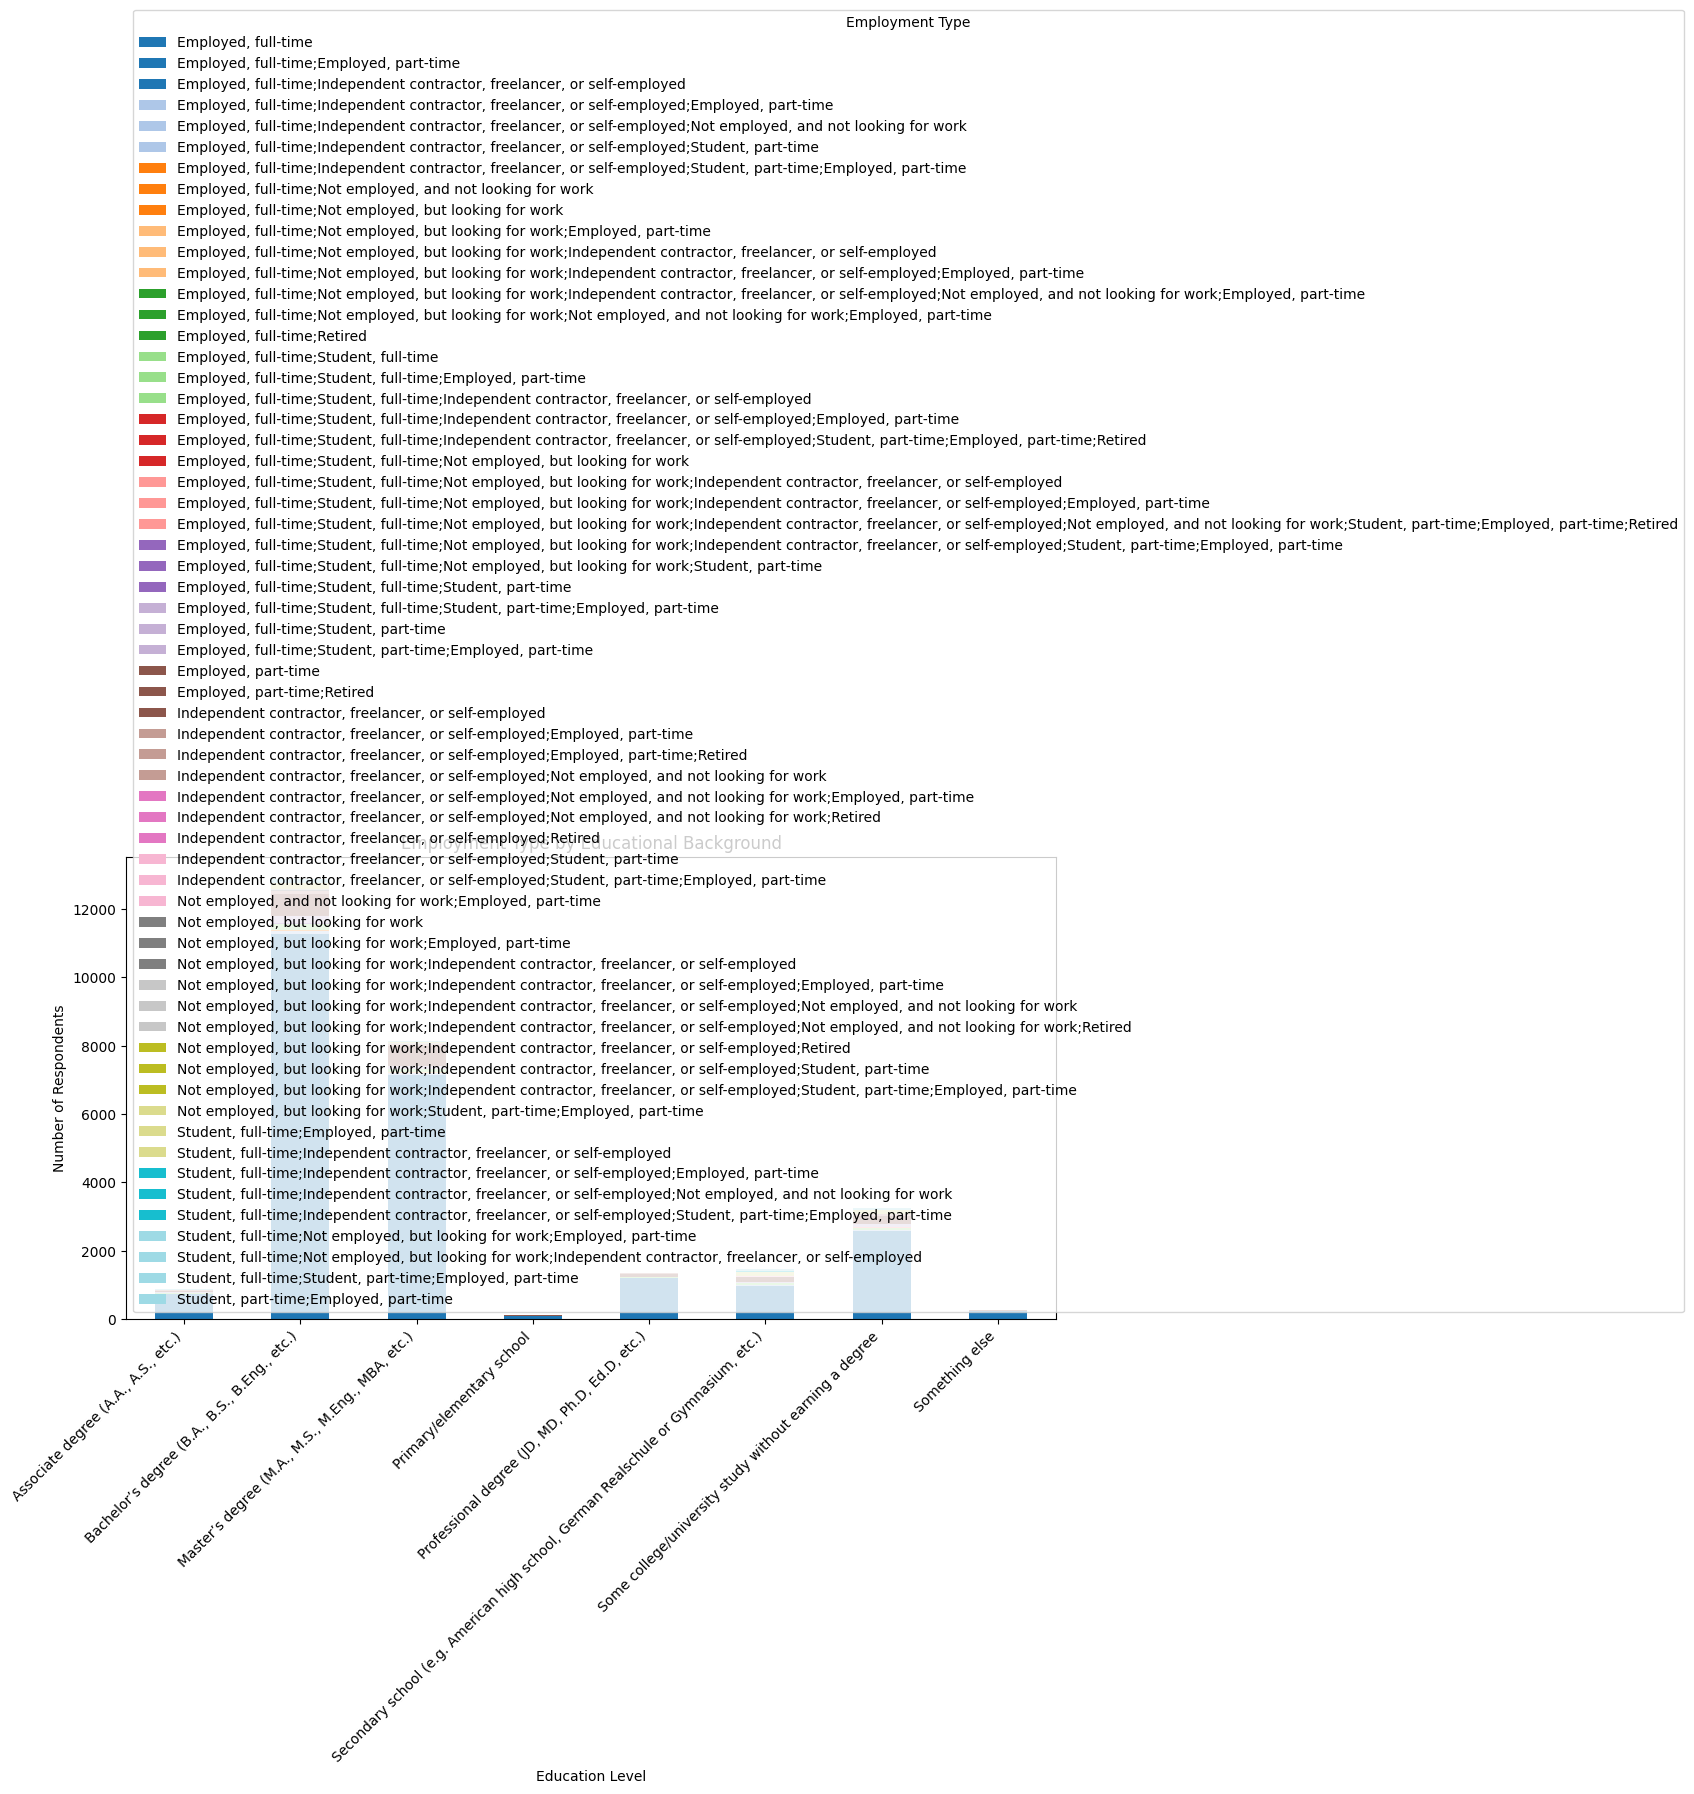

In [67]:
## Write your code here
# Cross-tabulation: count of Employment by EdLevel 
edu_emp_ct = pd.crosstab(df['EdLevel'], df['Employment'])
#print(edu_emp_ct)

# Normalize the counts to get proportions (optional)
edu_emp_prop = edu_emp_ct.div(edu_emp_ct.sum(axis=1), axis=0)

# Visualization: Stacked Bar Plot 
edu_emp_ct.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Employment Type by Educational Background')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Type')
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [69]:
## Write your code here
df.to_csv("survey_data_cleaned.csv", index=False)


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
